In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Importação dos dados

In [2]:
base = pd.read_csv('dados/BRAZIL_CITIES.csv', sep=';', decimal=',')

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 81 columns):
CITY                      5576 non-null object
STATE                     5576 non-null object
CAPITAL                   5576 non-null int64
IBGE_RES_POP              5568 non-null float64
IBGE_RES_POP_BRAS         5568 non-null float64
IBGE_RES_POP_ESTR         5568 non-null float64
IBGE_DU                   5566 non-null float64
IBGE_DU_URBAN             5566 non-null float64
IBGE_DU_RURAL             5495 non-null float64
IBGE_POP                  5568 non-null float64
IBGE_1                    5568 non-null float64
IBGE_1-4                  5568 non-null float64
IBGE_5-9                  5568 non-null float64
IBGE_10-14                5568 non-null float64
IBGE_15-59                5568 non-null float64
IBGE_60+                  5568 non-null float64
IBGE_PLANTED_AREA         5573 non-null float64
IBGE_CROP_PRODUCTION_$    5573 non-null float64
IDHM Ranking 2010         5568 no

De acordo com a descrição encontrada no Kaggle e com a quantidade de valores nulos, selecionei algumas colunas para entrar na analise

In [4]:
colunas = [
    'CITY', 'IBGE_DU', 'IBGE_POP', 'IBGE_RES_POP', 'IBGE_PLANTED_AREA', 'IDHM Ranking 2010', 'AREA', 'PAY_TV', 
    'FIXED_PHONES', 'Cars', 'Motorcycles', 'POST_OFFICES', 'Pr_Agencies', 'Pu_Agencies'
]

In [5]:
base[colunas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 14 columns):
CITY                 5576 non-null object
IBGE_DU              5566 non-null float64
IBGE_POP             5568 non-null float64
IBGE_RES_POP         5568 non-null float64
IBGE_PLANTED_AREA    5573 non-null float64
IDHM Ranking 2010    5568 non-null float64
AREA                 5574 non-null float64
PAY_TV               5573 non-null float64
FIXED_PHONES         5573 non-null float64
Cars                 5565 non-null float64
Motorcycles          5565 non-null float64
POST_OFFICES         5456 non-null float64
Pr_Agencies          3345 non-null float64
Pu_Agencies          3345 non-null float64
dtypes: float64(13), object(1)
memory usage: 610.0+ KB


Algumas variaveis irei preencher os valores nulo com zero para indicar que ela não possui a caracteristica, enquanto outras colunas que deveriam estar todas preenchidas vou preencher com a média.
Tambem irei renomear as colunas para que todas sigam um mesmo padrão

In [6]:
base['IBGE_DU'] = base['IBGE_DU'].fillna(base['IBGE_DU'].median())
base['IBGE_POP'] = base['IBGE_POP'].fillna(base['IBGE_POP'].median())
base['IBGE_RES_POP'] = base['IBGE_RES_POP'].fillna(base['IBGE_RES_POP'].median())
base['IBGE_PLANTED_AREA'] = base['IBGE_PLANTED_AREA'].fillna(base['IBGE_PLANTED_AREA'].median())
base['IDHM_RANKING_2010'] = base['IDHM Ranking 2010'].fillna(base['IDHM Ranking 2010'].median())
base['AREA'] = base['AREA'].fillna(base['AREA'].median())
base['PAY_TV'] = base['PAY_TV'].fillna(0)
base['FIXED_PHONES'] = base['FIXED_PHONES'].fillna(base['FIXED_PHONES'].median())
base['CARS'] = base['Cars'].fillna(0)
base['MOTORCYCLES'] = base['Motorcycles'].fillna(0)
base['POST_OFFICES'] = base['POST_OFFICES'].fillna(0)
base['PR_AGENCIES'] = base['Pr_Agencies'].fillna(0)
base['PU_AGENCIES'] = base['Pu_Agencies'].fillna(0)

In [7]:
colunas = [
    'CITY', 'IBGE_DU', 'IBGE_POP', 'IBGE_RES_POP', 'IBGE_PLANTED_AREA', 'IDHM_RANKING_2010', 'AREA', 'PAY_TV', 
    'FIXED_PHONES', 'CARS', 'MOTORCYCLES', 'POST_OFFICES', 'PR_AGENCIES', 'PU_AGENCIES'
]

Analisando as distribuições das variaveis

Maximo: 3576148.0
Minimo: 239.0
Media: 3175.0
Mediana: 3175.0


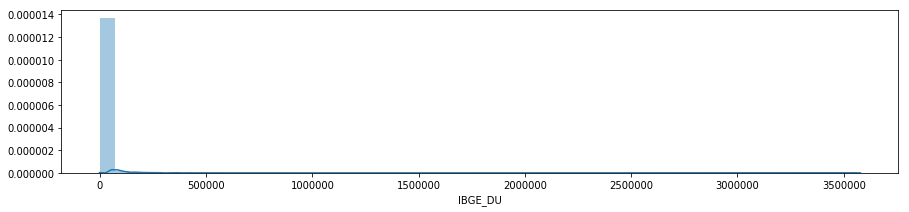

Maximo: 10463636.0
Minimo: 174.0
Media: 6177.0
Mediana: 6177.0


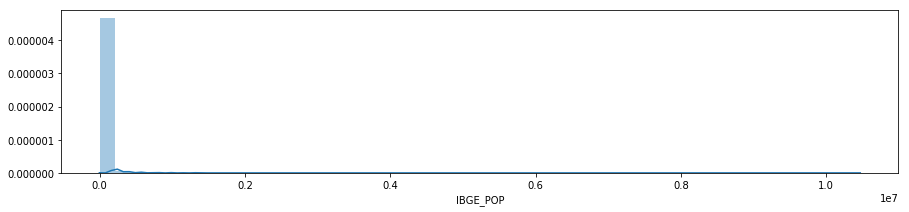

Maximo: 11253503.0
Minimo: 805.0
Media: 10935.0
Mediana: 10935.0


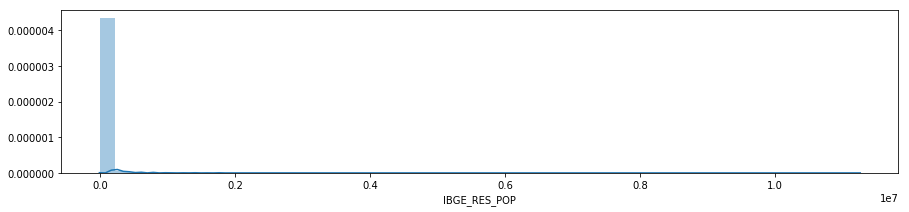

Maximo: 1205669.0
Minimo: 0.0
Media: 3473.0
Mediana: 3473.0


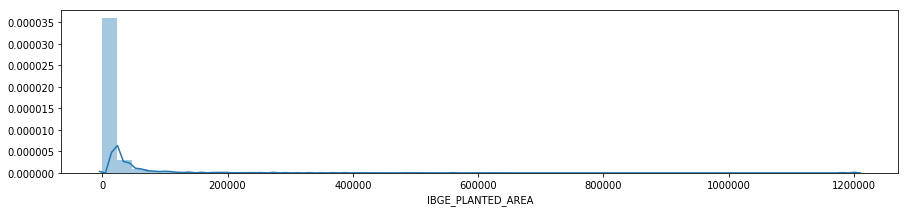

Maximo: 5565.0
Minimo: 1.0
Media: 2781.5
Mediana: 2781.5


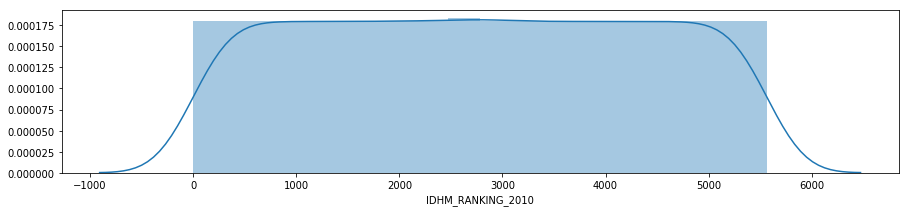

Maximo: 159533328.0
Minimo: 26.1
Media: 296000.0
Mediana: 296000.0


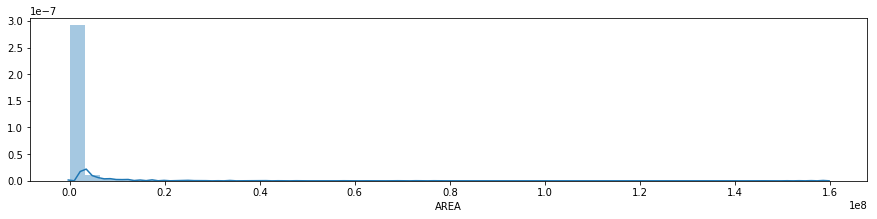

Maximo: 2047668.0
Minimo: 0.0
Media: 247.0
Mediana: 247.0


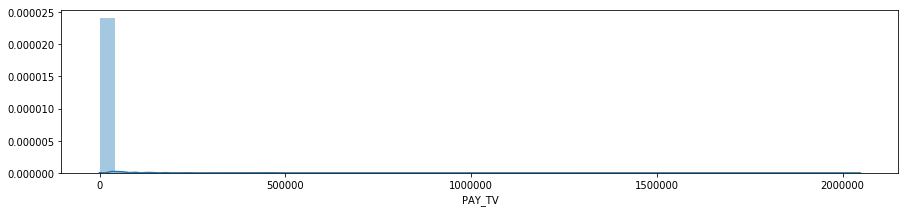

Maximo: 5543127.0
Minimo: 3.0
Media: 328.0
Mediana: 328.0


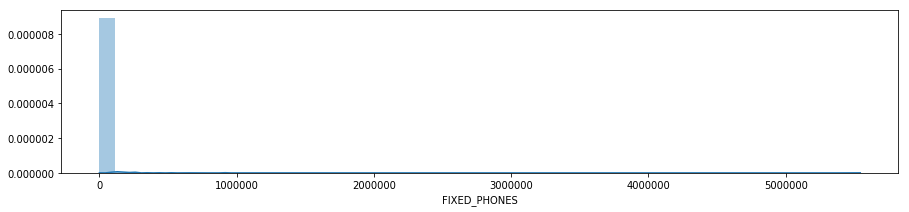

Maximo: 5740995.0
Minimo: 0.0
Media: 1433.0
Mediana: 1433.0


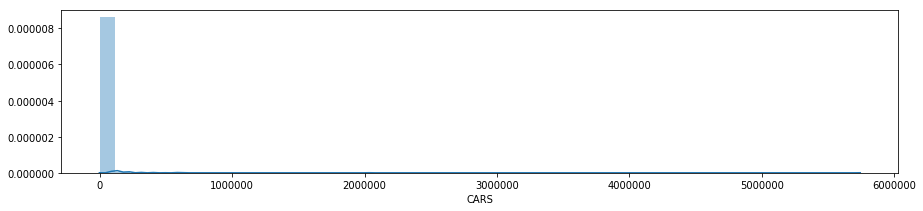

Maximo: 1134570.0
Minimo: 0.0
Media: 1282.0
Mediana: 1282.0


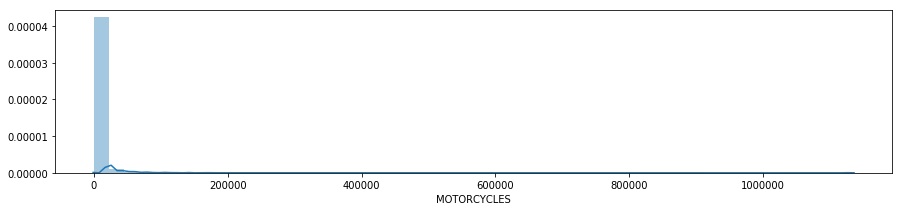

Maximo: 225.0
Minimo: 0.0
Media: 1.0
Mediana: 1.0


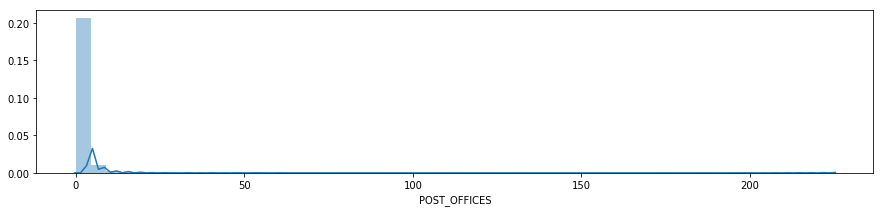

Maximo: 1693.0
Minimo: 0.0
Media: 0.0
Mediana: 0.0


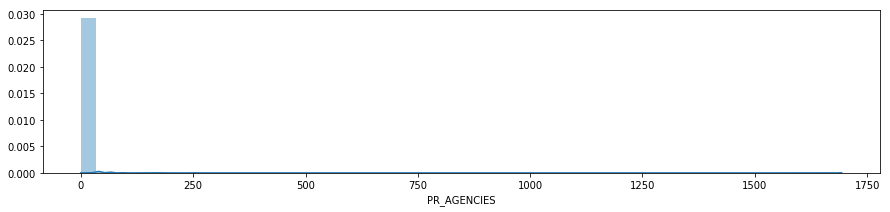

Maximo: 626.0
Minimo: 0.0
Media: 1.0
Mediana: 1.0


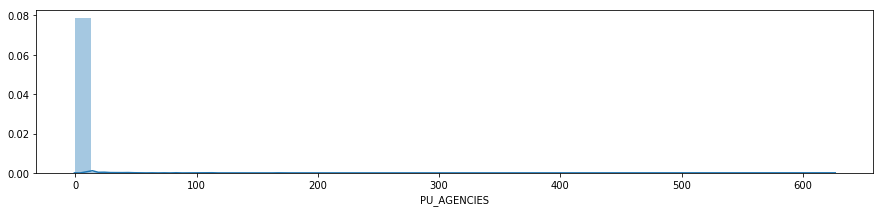

In [8]:
for coluna in base[colunas].drop('CITY', axis=1).columns:
    print('Maximo: ' + str(max(base[coluna])))
    print('Minimo: ' + str(min(base[coluna])))
    print('Media: ' + str(np.median(base[coluna])))
    print('Mediana: ' + str(np.median(base[coluna])))

    plt.figure(figsize=[15, 3])
    sns.distplot(base[coluna])
    plt.show()

In [9]:
base[colunas].to_csv('dados/base_cidades.csv', index=False)